## A notebook including parts of the data analysis for the accuracy of game and standard data 

- data visualization 
- test difference distribution between conditions for normality: Shapiro-Wilk test & visual assessment 
- test difference distribution for whether a task was completed first or second for normality: Shapiro-Wilk test
- data restructuring for follow-up analysis in R 


In [70]:
import pandas as pd
from scipy.stats import shapiro 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Plot all scene accuracies in grouped boxplot

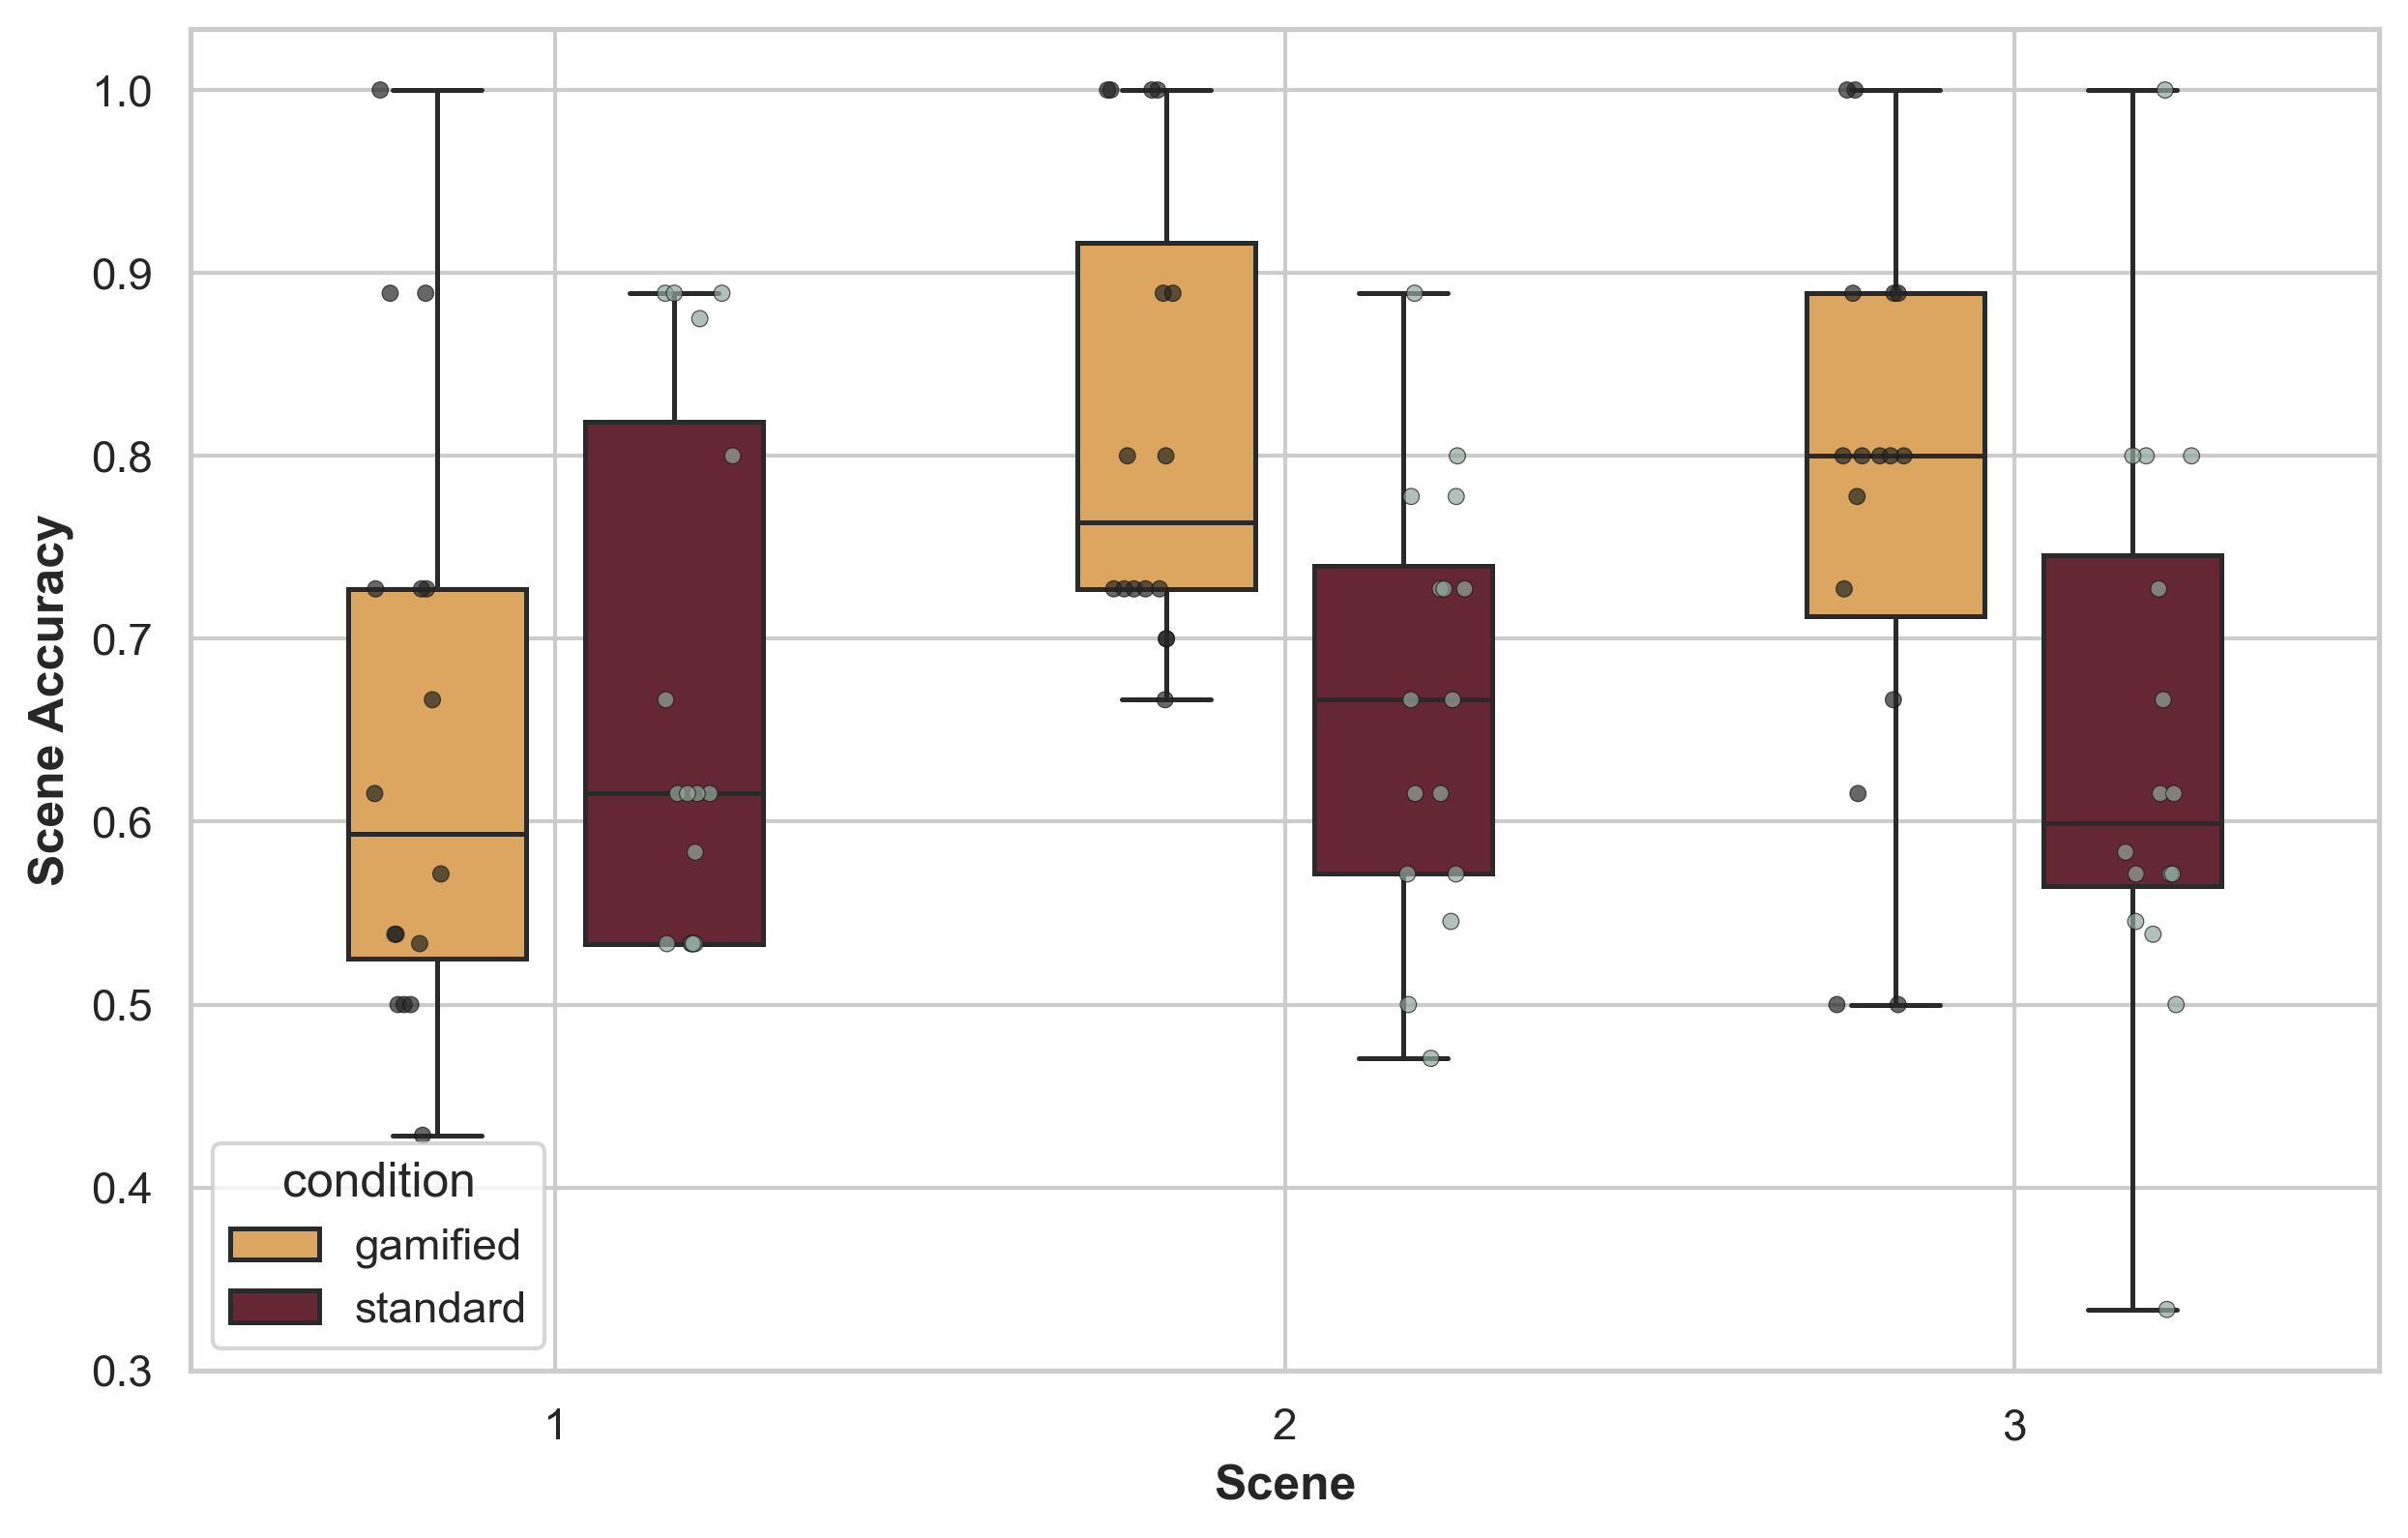

In [71]:
# read in dataframes with per scene accuracies
game_acc = pd.read_csv("game_perscene_accuracy.csv")
standard_acc = pd.read_csv("standard_perscene_accuracy.csv")


# Combine both datasets
combined_df = pd.concat([game_acc, standard_acc], ignore_index=True)

# Set theme
sns.set_theme(style="whitegrid")

# Define custom colors
palette = {
    "gamified": "#F1A84C",  
    "standard": "#6F1D2D"   
}

# Initialize the plot
plt.figure(figsize=(9, 6), dpi=300)


# Draw grouped boxplot
sns.boxplot(
    x='scene',
    y='SceneAccuracy',
    hue='condition',
    data=combined_df,
    palette=palette,
    width=0.65,
    fliersize=0,
    linewidth=1.2, 
    gap=0.25
)

# Overlay individual datapoints
sns.stripplot(
    x='scene',
    y='SceneAccuracy',
    hue='condition',
    data=combined_df,
    palette='dark:#91A79C',
    dodge=True,
    jitter=True,
    size=4,
    alpha=0.7,
    linewidth=0.3,
    legend=False
)


# Customize labels and layout
# setting font size
plt.rcParams.update({'font.size': 30})
#plt.title('Per Scene Accuracies', fontsize=18, fontweight='bold')
plt.xlabel('Scene', fontweight='bold')
plt.ylabel('Scene Accuracy', fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

### Overall accuracies 

There is one accuracy value per participant per condition - using t-tests we find out whether there is a significant difference in BCI task accuracy between the standard and the gamified condition. 

In [72]:
# Load the accuracy csv files 
game_df = pd.read_csv("game_overall_accuracy.csv")
standard_df = pd.read_csv("standard_overall_accuracy.csv")

game_df, standard_df

(        ID  Accuracy  PlaceInOrder condition
 0   02JO85  0.727273             1  gamified
 1   07az26  0.781250             1  gamified
 2   08MA21  0.718750             2  gamified
 3   09HA13  0.774194             1  gamified
 4   10PE77  0.705882             1  gamified
 5   11LK66  0.774194             2  gamified
 6   15JO96  0.631579             2  gamified
 7   17BE17  0.583333             2  gamified
 8   17HE69  0.800000             1  gamified
 9   19RA95  0.550000             1  gamified
 10  21EL67  0.696970             2  gamified
 11  27JA04  0.687500             1  gamified
 12  28CO38  0.793103             1  gamified
 13  29MA29  0.960000             2  gamified
 14   2BR68  0.705882             2  gamified
 15   2MA07  0.741935             2  gamified,
         ID  Accuracy  PlaceInOrder condition
 0   02JO85  0.741935             2  standard
 1   07az26  0.621622             2  standard
 2   08MA21  0.500000             1  standard
 3   09HA13  0.705882            

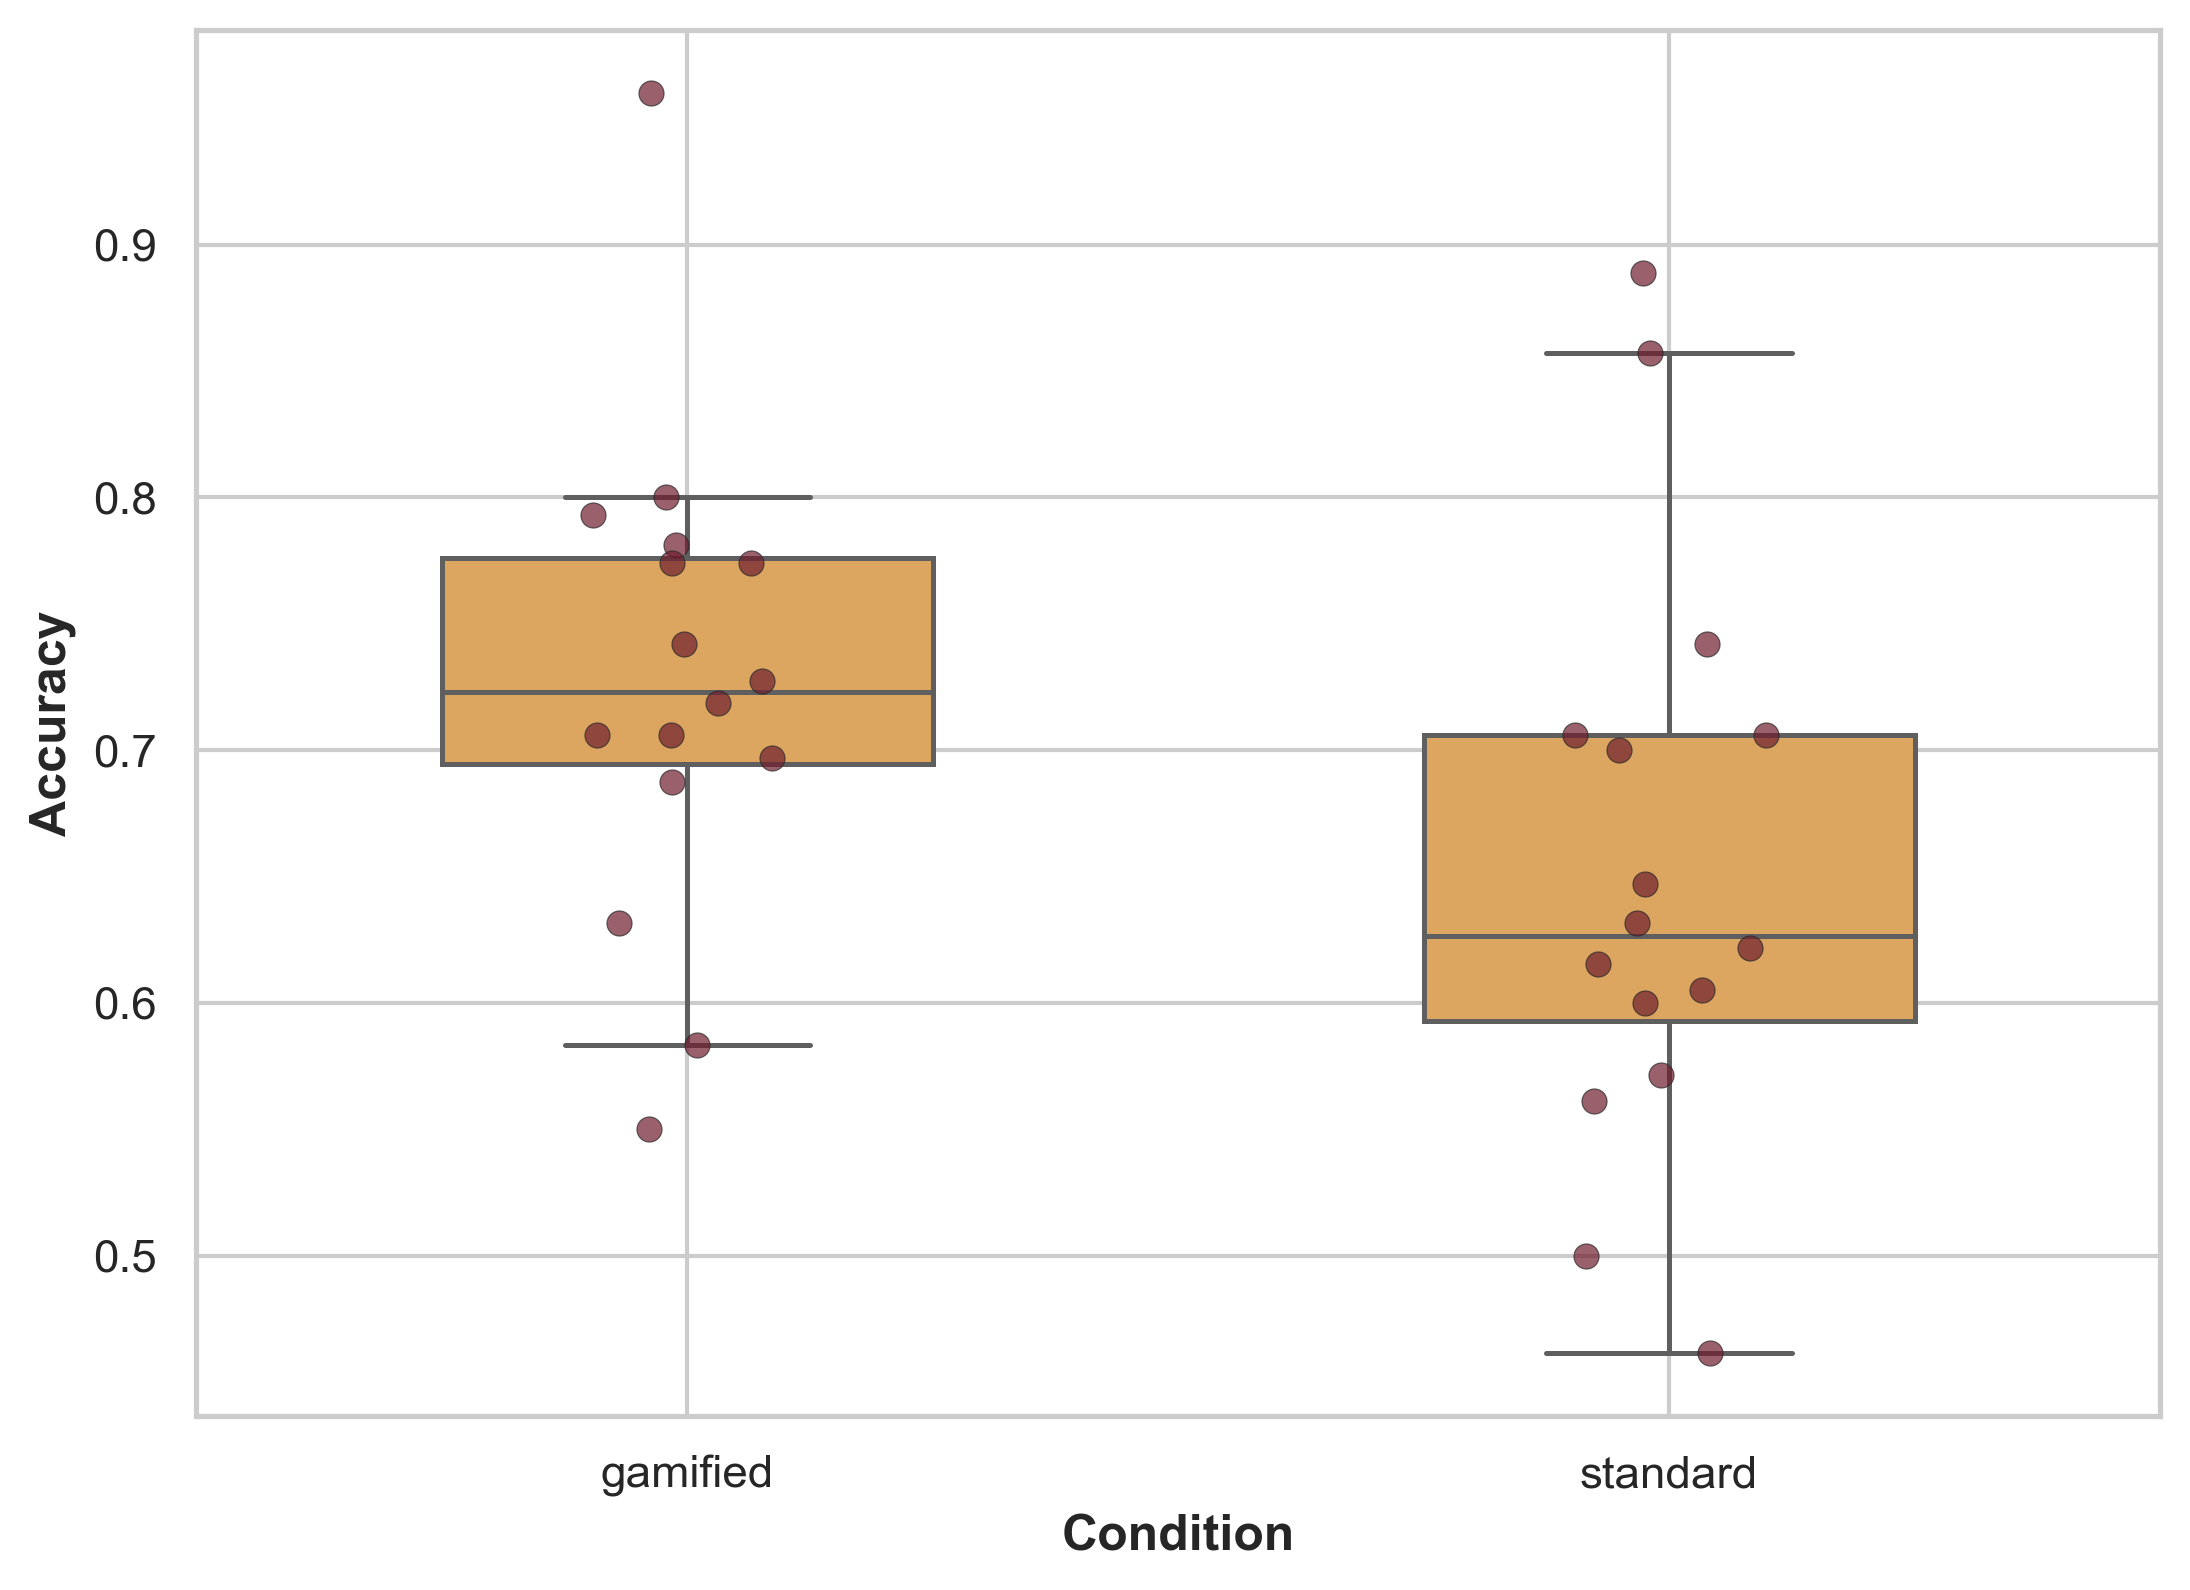

In [73]:
# another boxplot comparing the two per condition accuracies
concat = pd.concat([game_df, standard_df]).reset_index(drop=True)

# Set theme
sns.set_theme(style="whitegrid")

# Initialize the plot
plt.figure(figsize=(8, 6), dpi=300)

# boxes
sns.boxplot(
    data=concat, 
    x='condition', 
    y='Accuracy', 
    color='#F1A84C', 
    width=0.5,
    fliersize=0,
    linewidth=1.2
)

# Overlay individual datapoints
sns.stripplot(
    data=concat,
    x='condition',
    y='Accuracy',
    color='#6F1D2D',
    dodge=True,
    jitter=True,
    size=6,
    alpha=0.7,
    linewidth=0.3,
    legend=False
)


# Customize labels and layout
plt.rcParams.update({'font.size': 30})
#plt.title('Per Condition Accuracies', fontsize=18, fontweight='bold')
plt.xlabel('Condition', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()


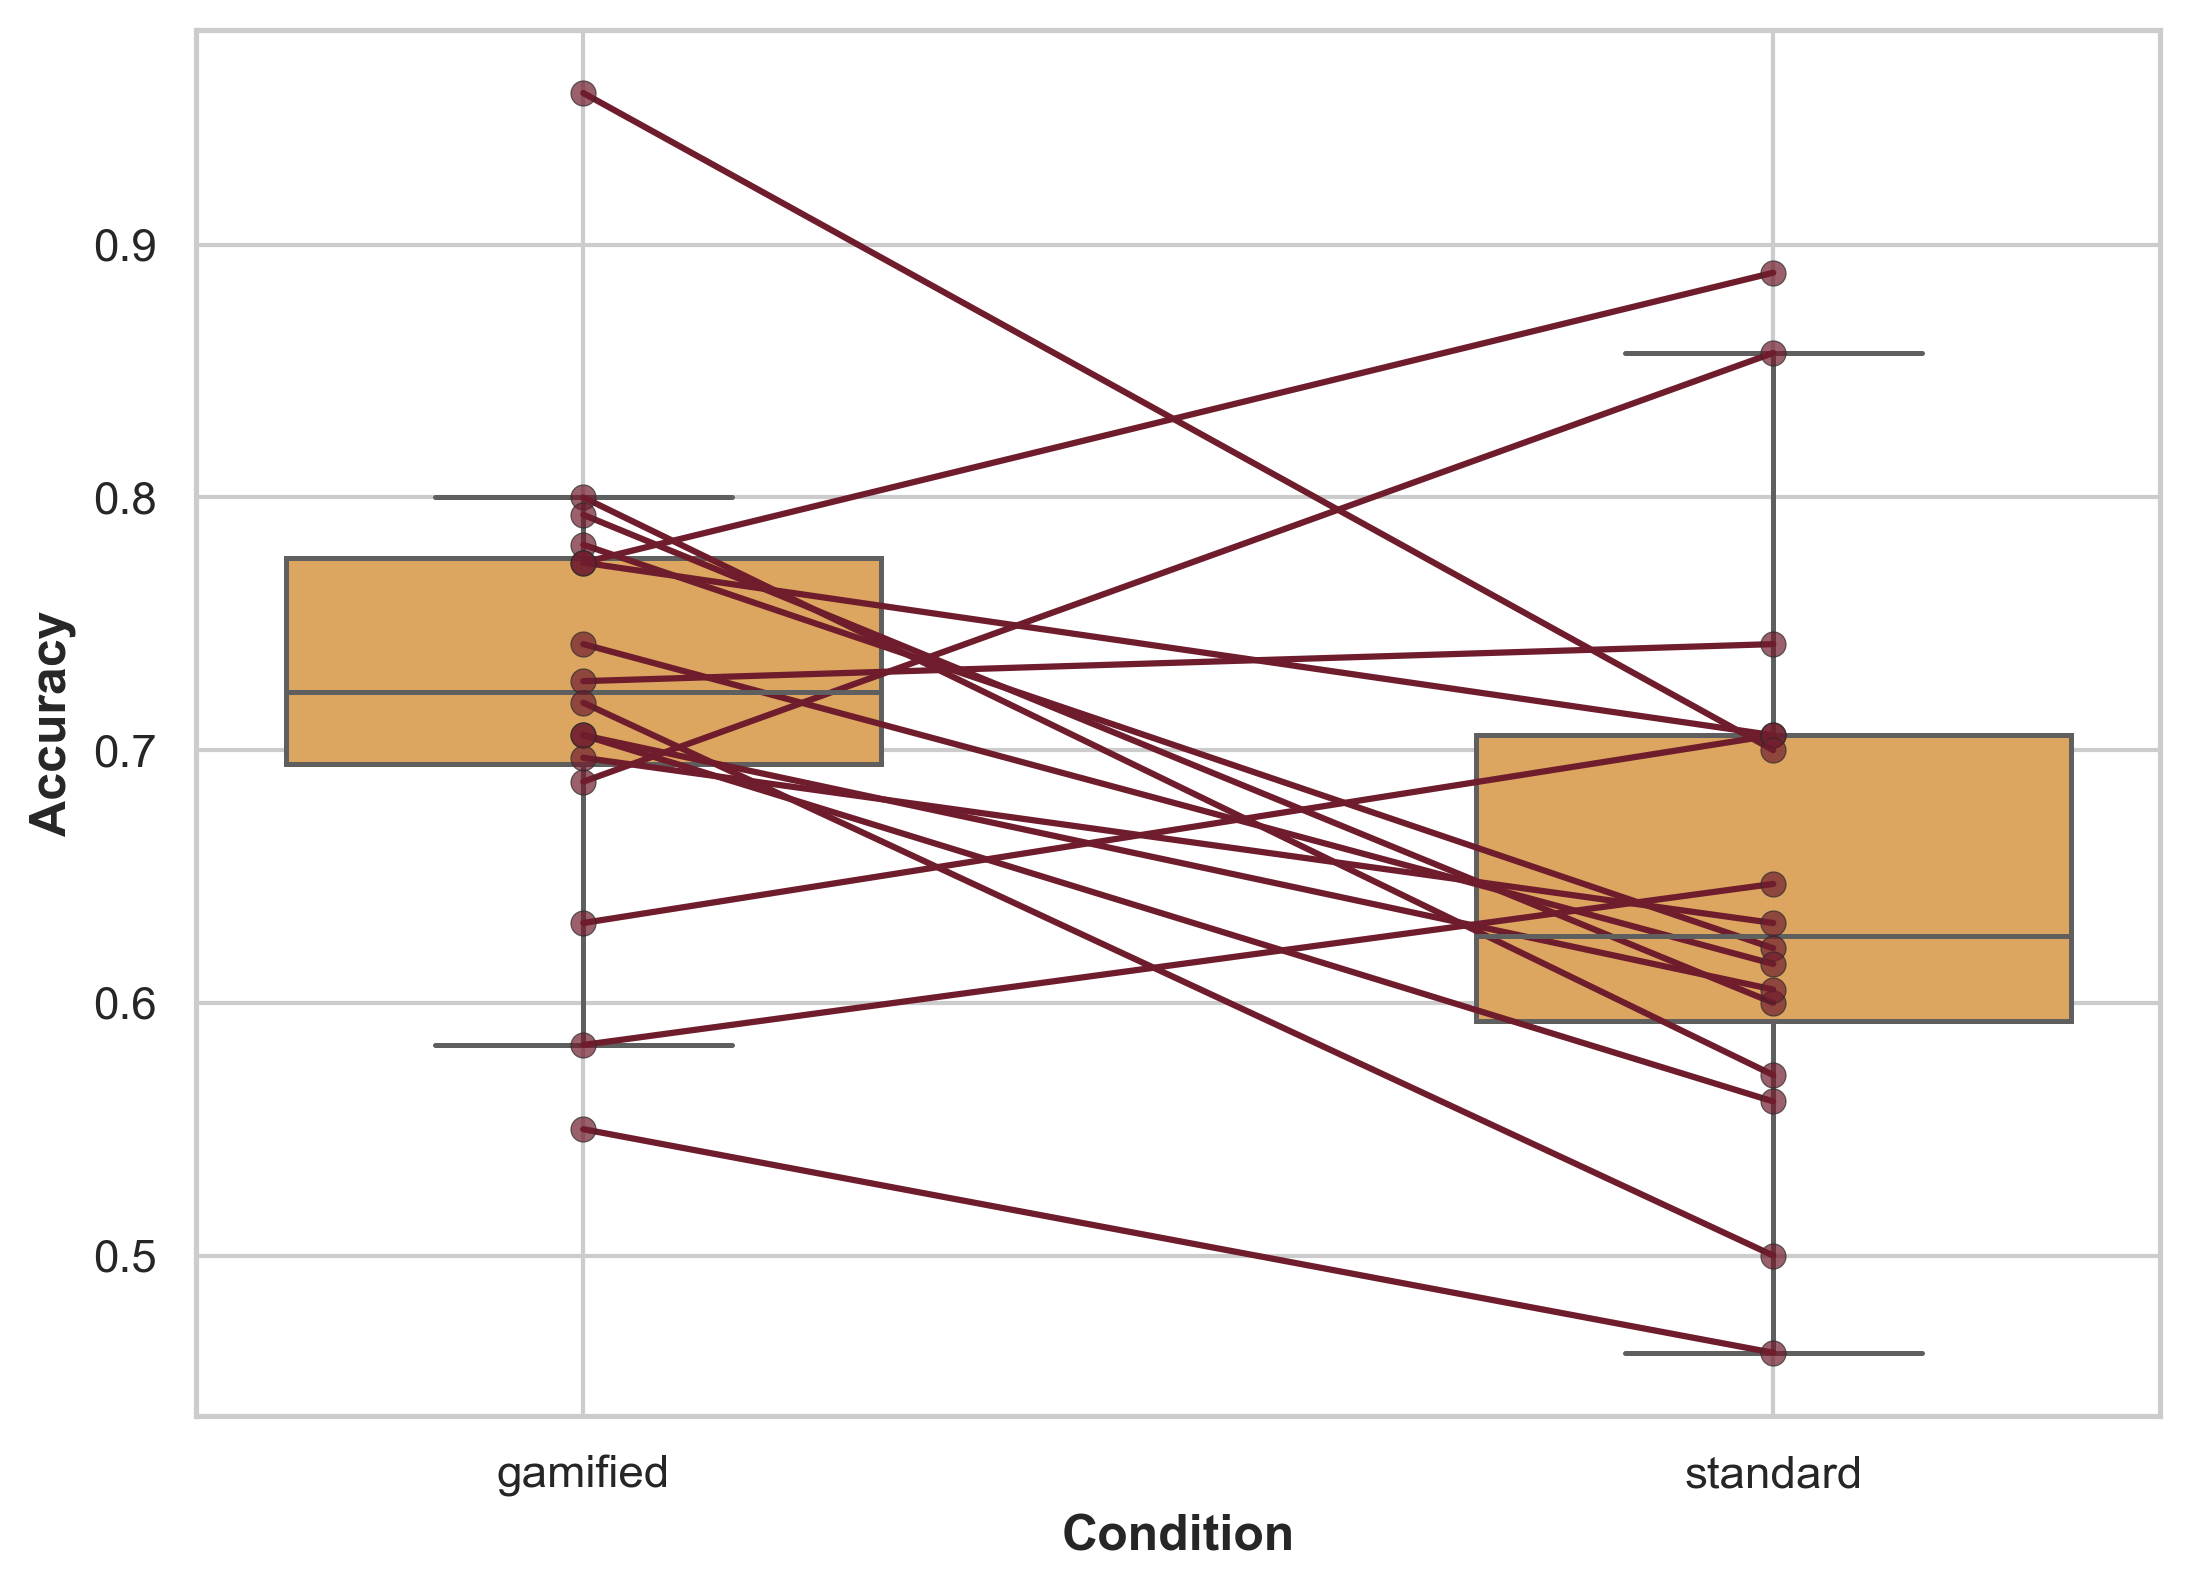

In [74]:
# another boxplot comparing the two per condition accuracies - with lines connecting IDs 
concat = pd.concat([game_df, standard_df]).reset_index(drop=True)

# Set theme
sns.set_theme(style="whitegrid")

# Initialize the plot
plt.figure(figsize=(8, 6), dpi=300)

# boxes
sns.boxplot(
    data=concat, 
    x='condition', 
    y='Accuracy', 
    color='#F1A84C', 
    width=0.5,
    fliersize=0,
    linewidth=1.2
)

# Overlay individual datapoints
sns.stripplot(
    data=concat,
    x='condition',
    y='Accuracy',
    color='#6F1D2D',
    dodge=True,
    jitter=False,
    size=6,
    alpha=0.7,
    linewidth=0.3,
    legend=False
)

sns.lineplot(
    data=concat,
    x='condition',
    y='Accuracy',
    color='#6F1D2D', 
    units='ID',
    estimator=None
)


# Customize labels and layout
plt.rcParams.update({'font.size': 30})
#plt.title('Per Condition Accuracies', fontsize=18, fontweight='bold')
plt.xlabel('Condition', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
# Merge the dataframes on ID
merged_df = pd.merge(standard_df[['ID', 'Accuracy']], 
                     game_df[['ID', 'Accuracy']], 
                     on='ID', 
                     suffixes=('_standard', '_game'))

# Calculate difference scores between the conditions 
merged_df['diff'] = merged_df['Accuracy_game'] - merged_df['Accuracy_standard']

merged_df.to_csv('acc_diffs.csv', index=False)

print(merged_df)

        ID  Accuracy_standard  Accuracy_game      diff
0   02JO85           0.741935       0.727273 -0.014663
1   07az26           0.621622       0.781250  0.159628
2   08MA21           0.500000       0.718750  0.218750
3   09HA13           0.705882       0.774194  0.068311
4   10PE77           0.560976       0.705882  0.144907
5   11LK66           0.888889       0.774194 -0.114695
6   15JO96           0.705882       0.631579 -0.074303
7   17BE17           0.647059       0.583333 -0.063725
8   17HE69           0.571429       0.800000  0.228571
9   19RA95           0.461538       0.550000  0.088462
10  21EL67           0.631579       0.696970  0.065391
11  27JA04           0.857143       0.687500 -0.169643
12  28CO38           0.600000       0.793103  0.193103
13  29MA29           0.700000       0.960000  0.260000
14   2BR68           0.605263       0.705882  0.100619
15   2MA07           0.615385       0.741935  0.126551


#### Plotting

Get a historgram with a normal distribution overlay and a qq plot to check for normality graphically

Create Boxplot to show min, max, median, and Q1 & Q3 of the difference scores 

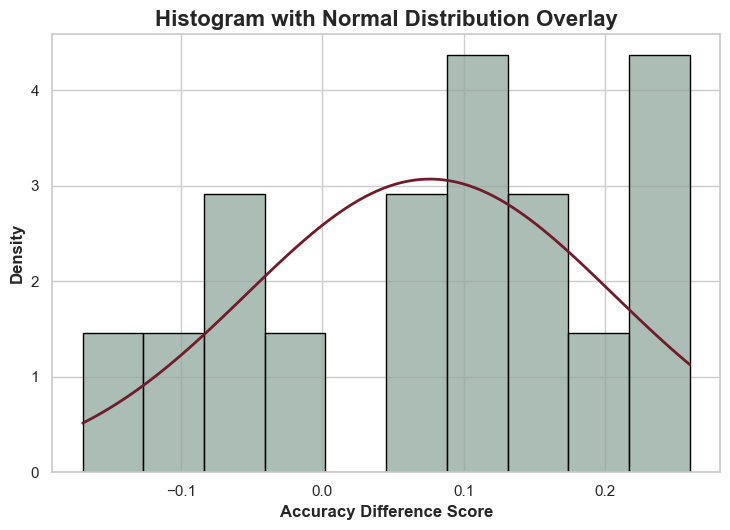

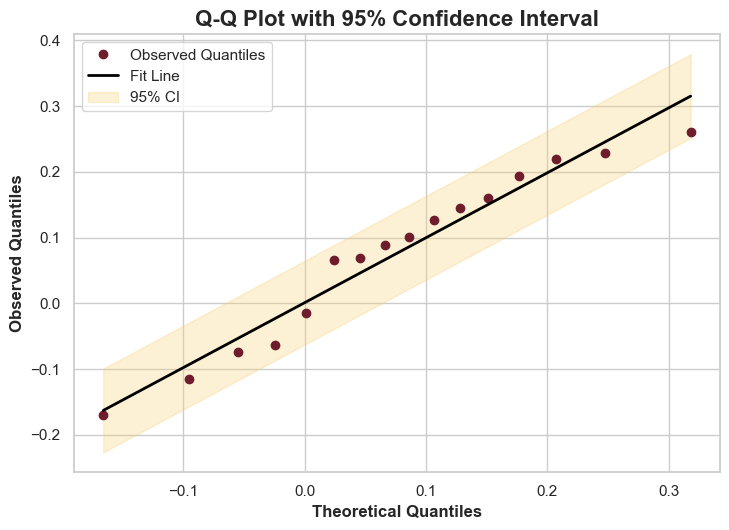

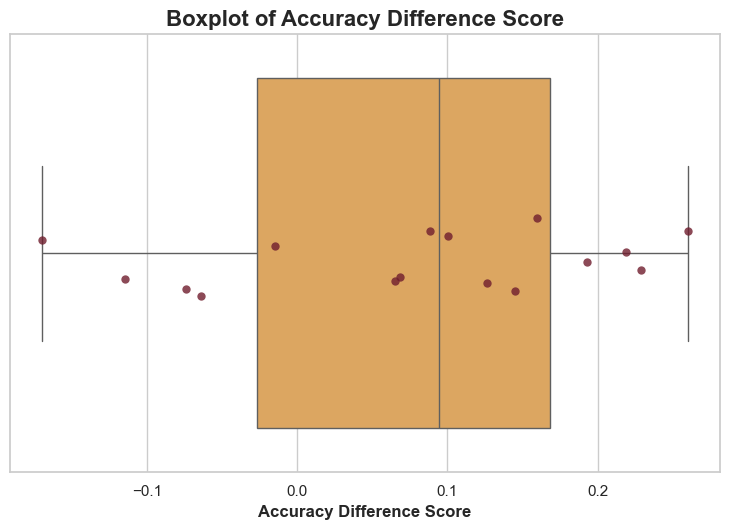

In [76]:
# get difference data 
accuracy_data = merged_df['diff']

# Define customized colors
hist_color = "#91A79C"
box_color = "#F1A84C"
line_color = "#6F1D2D"
ci_color = "#F7D175"

# 1. Histogram with normal distribution overlay
plt.figure(figsize=(8, 6))
sns.histplot(accuracy_data, kde=False, stat="density", bins=10, color=hist_color, edgecolor="black")
mu, std = accuracy_data.mean(), accuracy_data.std()
x = np.linspace(accuracy_data.min(), accuracy_data.max(), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, line_color, linewidth=2)
plt.title("Histogram with Normal Distribution Overlay", fontsize=16, fontweight="bold")
plt.xlabel("Accuracy Difference Score", fontweight="bold")
plt.ylabel("Density", fontweight="bold")
plt.tight_layout()
plt.show()

# 2. Q-Q Plot with 95% Confidence Interval
plt.figure(figsize=(8, 6))
sorted_data = np.sort(accuracy_data)
n = len(sorted_data)
theoretical_quants = stats.norm.ppf((np.arange(1, n + 1) - 0.5) / n, loc=mu, scale=std)
slope, intercept, r_value, p_value, std_err = stats.linregress(theoretical_quants, sorted_data)
fit_line = slope * theoretical_quants + intercept
se = (std / np.sqrt(n)) * 1.96
lower_bound = fit_line - se
upper_bound = fit_line + se

plt.plot(theoretical_quants, sorted_data, 'o', label='Observed Quantiles', color=line_color)
plt.plot(theoretical_quants, fit_line, 'black', label='Fit Line', linewidth=2)
plt.fill_between(theoretical_quants, lower_bound, upper_bound, color=ci_color, alpha=0.3, label='95% CI')
plt.title("Q-Q Plot with 95% Confidence Interval", fontsize=16, fontweight="bold")
plt.xlabel("Theoretical Quantiles", fontweight="bold")
plt.ylabel("Observed Quantiles", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=accuracy_data, color=box_color)
# Overlay individual datapoints (stripplot)
sns.stripplot(x=accuracy_data, color=line_color, size=6, jitter=True, alpha=0.8)
plt.title("Boxplot of Accuracy Difference Score", fontsize=16, fontweight="bold")
plt.xlabel("Accuracy Difference Score", fontweight="bold")
plt.tight_layout()
plt.show()


#### Analytic normality test

Use Shapiro-Wilk test given the small sample size

In [77]:
# Shapiro-Wilk Test to check normality assumption 
shapiro_stat, shapiro_p = shapiro(merged_df['diff'])
print(f"Shapiro-Wilk Test:\nStatistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Data appears to be normally distributed (H0 cannot be rejected)")
else:
    print("Data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Test:
Statistic = 0.9500, p-value = 0.4901
Data appears to be normally distributed (H0 cannot be rejected)


### Novelty effect

Boxplots of the accuracies for the order of conditions: for each condition plot the accuracies for when the condition was completed first or second. 

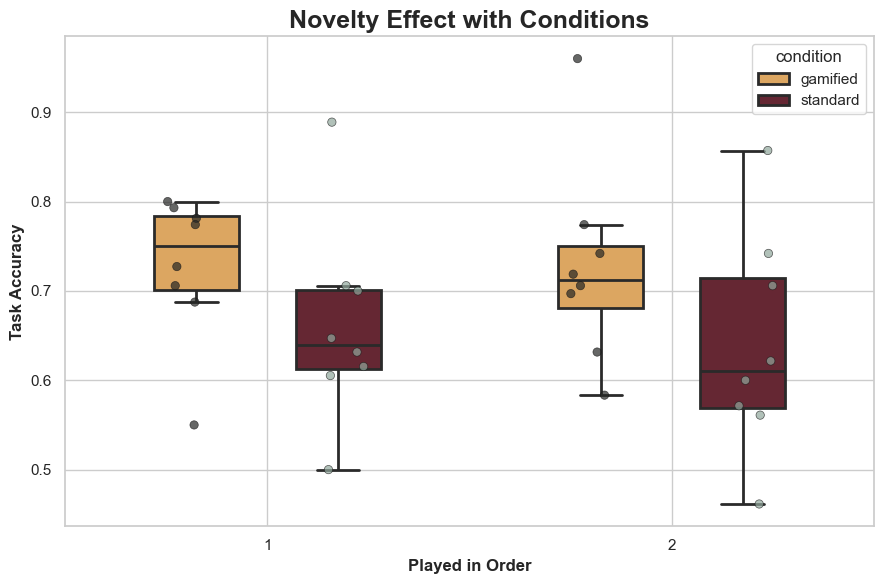

In [78]:
# Load the accuracy csv files 
game_df = pd.read_csv("game_overall_accuracy.csv")
standard_df = pd.read_csv("standard_overall_accuracy.csv")

# concatenate into one 
concat = pd.concat([game_df, standard_df]).reset_index(drop=True)

# Set theme
sns.set_theme(style="whitegrid")

# Define custom colors
palette = {
    "gamified": "#F1A84C",  
    "standard": "#6F1D2D"   
}

# Initialize the plot
plt.figure(figsize=(9, 6))


# Draw grouped boxplot
sns.boxplot(
    x='PlaceInOrder',
    y='Accuracy',
    hue='condition',
    data=concat,
    palette=palette,
    width=0.7,
    fliersize=0,
    linewidth=2, 
    gap=0.4
)

# Overlay individual datapoints
sns.stripplot(
    x='PlaceInOrder',
    y='Accuracy',
    hue='condition',
    data=concat,
    palette='dark:#91A79C',
    dodge=True,
    jitter=True,
    size=6,
    alpha=0.7,
    linewidth=0.5,
    legend=False
)


# Customize labels and layout
plt.title('Novelty Effect with Conditions', fontsize=18, fontweight='bold')
plt.xlabel('Played in Order', fontweight='bold')
plt.ylabel('Task Accuracy', fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()



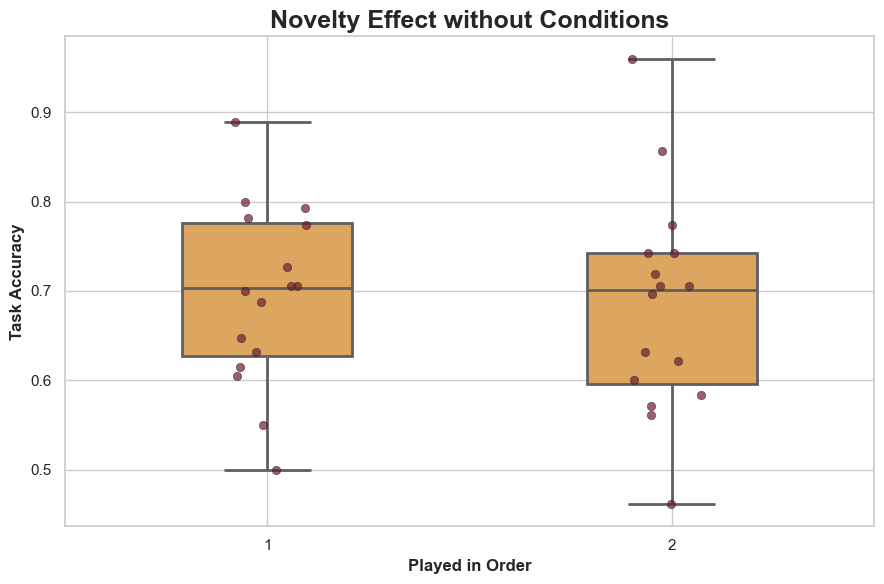

In [79]:
# independent of standard vs. gamified -- only 1st vs. 2nd task 

# Set theme
sns.set_theme(style="whitegrid")

# Initialize the plot
plt.figure(figsize=(9, 6))


# Draw grouped boxplot
sns.boxplot(
    x='PlaceInOrder',
    y='Accuracy',
    data=concat,
    color="#F1A84C",
    width=0.7,
    fliersize=0,
    linewidth=2, 
    gap=0.4
)

# Overlay individual datapoints
sns.stripplot(
    x='PlaceInOrder',
    y='Accuracy',
    data=concat,
    color= "#6F1D2D",
    dodge=True,
    jitter=True,
    size=6,
    alpha=0.7,
    linewidth=0.5,
    legend=False
)


# Customize labels and layout
plt.title('Novelty Effect without Conditions', fontsize=18, fontweight='bold')
plt.xlabel('Played in Order', fontweight='bold')
plt.ylabel('Task Accuracy', fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()



#### Calcualte difference scores for accuracy for first task vs. second task and test for normality 

In [80]:
df_1 = concat[concat["PlaceInOrder"] == 1].reset_index(drop=True)
df_1

,ID,Accuracy,PlaceInOrder,condition
0,02JO85,0.727273,1,gamified
1,07az26,0.781250,1,gamified
2,09HA13,0.774194,1,gamified
3,10PE77,0.705882,1,gamified
4,17HE69,0.800000,1,gamified
5,19RA95,0.550000,1,gamified
6,27JA04,0.687500,1,gamified
7,28CO38,0.793103,1,gamified
8,08MA21,0.500000,1,standard
9,11LK66,0.888889,1,standard


In [81]:
df_2 = concat[concat["PlaceInOrder"] == 2].reset_index(drop=True)
df_2

,ID,Accuracy,PlaceInOrder,condition
0,08MA21,0.718750,2,gamified
1,11LK66,0.774194,2,gamified
2,15JO96,0.631579,2,gamified
3,17BE17,0.583333,2,gamified
4,21EL67,0.696970,2,gamified
5,29MA29,0.960000,2,gamified
6,2BR68,0.705882,2,gamified
7,2MA07,0.741935,2,gamified
8,02JO85,0.741935,2,standard
9,07az26,0.621622,2,standard


In [82]:
# Merge the dataframes on ID
merged = pd.merge(df_1[['ID', 'Accuracy']], 
                     df_2[['ID', 'Accuracy']], 
                     on='ID', 
                     suffixes=('_1', '_2'))

# Calculate difference scores between the conditions 
merged['diff'] = merged['Accuracy_1'] - merged['Accuracy_2']

# export to be used in R 
merged.to_csv("order_diffs.csv", index=False)

merged

,ID,Accuracy_1,Accuracy_2,diff
0,02JO85,0.727273,0.741935,-0.014663
1,07az26,0.781250,0.621622,0.159628
2,09HA13,0.774194,0.705882,0.068311
3,10PE77,0.705882,0.560976,0.144907
4,17HE69,0.800000,0.571429,0.228571
5,19RA95,0.550000,0.461538,0.088462
6,27JA04,0.687500,0.857143,-0.169643
7,28CO38,0.793103,0.600000,0.193103
8,08MA21,0.500000,0.718750,-0.218750
9,11LK66,0.888889,0.774194,0.114695


In [83]:
# Shapiro-Wilk Test to check normality assumption 
shapiro_stat, shapiro_p = shapiro(merged['diff'])
print(f"Shapiro-Wilk Test:\nStatistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Data appears to be normally distributed (H0 cannot be rejected)")
else:
    print("Data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Test:
Statistic = 0.9449, p-value = 0.4128
Data appears to be normally distributed (H0 cannot be rejected)


### Prepare the data for a 2x3 repeated measures ANOVA 

The corresponding analysis will be run in R 

In [84]:
# Load the accuracy csv files 
game_df = pd.read_csv("game_perscene_accuracy.csv")
standard_df = pd.read_csv("standard_perscene_accuracy.csv")

game_df.head(), standard_df.head()

# concatenate the two dataframes
df_anova = pd.concat([game_df, standard_df], ignore_index=True)

df_anova = df_anova[['ID', 'scene', 'SceneAccuracy', 'condition']]

# export to csv for further analysis in R 
df_anova.to_csv('anova_structure_acc.csv', index=False)

df_anova


,ID,scene,SceneAccuracy,condition
0,02JO85,1,0.727273,gamified
1,02JO85,2,0.727273,gamified
2,02JO85,3,0.727273,gamified
3,07az26,1,0.615385,gamified
4,07az26,2,1.000000,gamified
...,...,...,...,...
91,2BR68,2,0.777778,standard
92,2BR68,3,0.571429,standard
93,2MA07,1,0.615385,standard
94,2MA07,2,0.666667,standard


In [ ]:
# wide format
df_anova['cond_scene'] = df_anova['condition'].astype(str) + '.' + df_anova['scene'].astype(str)

# Pivot to wide format
wide_anova = df_anova.pivot_table(
    index='ID',
    columns='cond_scene',
    values='SceneAccuracy'
).reset_index()

# Flatten the column names to get rid of multi index
wide_anova.columns.name = None

# export to csv for further analysis in R 
wide_anova.to_csv('wide_anova_structure_acc.csv', index=False)

wide_anova


,ID,gamified.1,gamified.2,gamified.3,standard.1,standard.2,standard.3
0,02JO85,0.727273,0.727273,0.727273,0.875000,0.615385,0.800000
1,07az26,0.615385,1.000000,0.800000,0.615385,0.666667,0.583333
2,08MA21,0.538462,0.727273,1.000000,0.533333,0.470588,0.500000
3,09HA13,0.888889,0.666667,0.800000,0.666667,0.727273,0.727273
4,10PE77,0.533333,0.800000,0.888889,0.533333,0.615385,0.538462
5,11LK66,0.666667,0.800000,0.888889,0.888889,0.800000,1.000000
6,15JO96,0.571429,0.727273,0.615385,0.888889,0.727273,0.571429
7,17BE17,0.428571,1.000000,0.500000,0.615385,0.545455,0.800000
8,17HE69,0.888889,0.727273,0.800000,0.533333,0.571429,0.615385
9,19RA95,0.500000,0.700000,0.500000,0.583333,0.500000,0.333333
